Accuracy (R²): 39.53 %


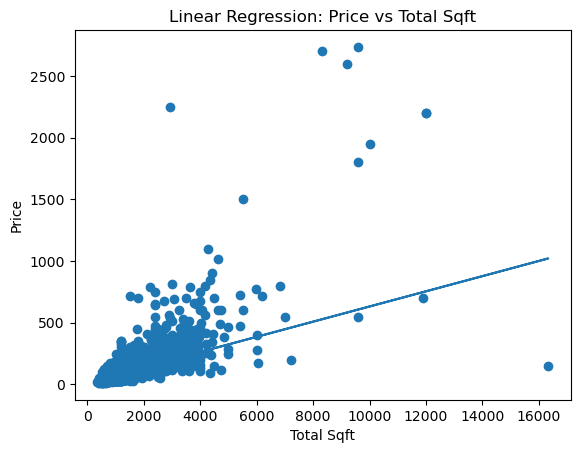

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
df = pd.read_csv("bengaluru_house_prices.csv")

# Select required columns
df = df[['total_sqft', 'price']]

# Convert total_sqft to numeric
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Remove outliers
df = df[(df['total_sqft'] > 300) & (df['price'] > 10)]

# Feature & target (ONLY ONE FEATURE)
X = df[['total_sqft']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Accuracy
accuracy = r2_score(y_test, y_pred)
print("Accuracy (R²):", round(accuracy * 100, 2), "%")

# ---- STRAIGHT LINE GRAPH ----
plt.scatter(X_test, y_test)      # Actual points
plt.plot(X_test, y_pred)         # Straight regression line
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Linear Regression: Price vs Total Sqft")
plt.show()
